In [171]:
from tensorflow.keras.datasets import reuters

size=10000

(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=size)

print(f'Train dataset shape: {train_data.shape}, and type: {train_data.dtype}')
print(f'Test dataset shape: {test_data.shape}, and type: {test_data.dtype}')
print(f'Example of sample: {train_data[0]}')

Train dataset shape: (8982,), and type: object
Test dataset shape: (2246,), and type: object
Example of sample: [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [172]:
import numpy as np

print(np.unique(train_labels))
print(np.unique(test_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


In [173]:
word_index=reuters.get_word_index()
print(f'Example of 8. indexes : {list(word_index.items())[0:8]}')

#change positions
inverted_index=dict([v,k] for (k,v) in word_index.items())
def decodeNews(wordList):
    return " ".join([inverted_index.get(i-3, '?') for i in wordList])

#decoding firsts 7 reviews in train set (with labels of sentiment)
for i in range(7):
    print(train_labels[i], decodeNews(train_data[i]))

Example of 8. indexes : [('mdbl', 10996), ('fawc', 16260), ('degussa', 12089), ('woods', 8803), ('hanging', 13796), ('localized', 20672), ('sation', 20673), ('chanthaburi', 20675)]
3 ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
4 ? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3
3 ? shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlr

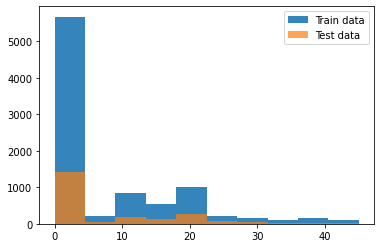

In [174]:
import matplotlib.pyplot as plt

plt.hist(train_labels, alpha=0.9, label='Train data')
plt.hist(test_labels, alpha=0.7, label='Test data')
plt.legend(loc='upper right')
plt.show()

In [175]:
#bag of words
def bowEncode(data, dimension=size):
    #create an array with zeros es long as data (e.g. training set)
    result=np.zeros((len(data), dimension))
    #for all index:values pair in enumerate data
    for index, value in enumerate(data):
        for word in value:
            result[index,word]=1.
    #return a samples with 1, as on samples posision's was a word from bag of words        
    return result

x_train=bowEncode(train_data)
x_test=bowEncode(test_data)

print(f'Sample of encoded training set: {x_train[1:6]}')
print(f'Sample of encoded test set: {x_test[1:6]}')

Sample of encoded training set: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
Sample of encoded test set: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [176]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

print(y_train)
print(y_train.shape)

[ 3.  4.  3. ... 25.  3. 25.]
(8982,)


In [177]:
#  one-hot encoding
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

print(f'one_hot_train_labels sample : {one_hot_train_labels[0]}')

one_hot_train_labels sample : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [178]:
# crreating an array with keras function
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [179]:
train_frac = 0.9
ntr = int(train_frac*x_train.shape[0])
xp_train = x_train[:ntr] # x partial train
yp_train = one_hot_train_labels[:ntr]
x_val = x_train[ntr:]
y_val = one_hot_train_labels[ntr:]

In [180]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))                             # warstwa wyjściowa ma 46 neuronów, bo jest 46 kategorii i softmax, bo klasyfikacja wieloklasowa i potem z tego samego powodu categorical crossentropy

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [181]:
from keras import models, layers

epochs = 20

model1 = models.Sequential([
    #dense: neurons, activation function
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation = 'softmax') #softmax for many classes
])

model1.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history1 = model1.fit(xp_train,yp_train, epochs = epochs, batch_size = 128, validation_data= (x_val, y_val), verbose = 1)
model.summary()

Epoch 1/20
64/64 [==============================] - 0s 4ms/step - loss: 1.8785 - accuracy: 0.6145 - val_loss: 1.3327 - val_accuracy: 0.7108
Epoch 2/20
64/64 [==============================] - 0s 3ms/step - loss: 0.9928 - accuracy: 0.7804 - val_loss: 1.1506 - val_accuracy: 0.7475
Epoch 3/20
64/64 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.8489 - val_loss: 1.0439 - val_accuracy: 0.7742
Epoch 4/20
64/64 [==============================] - 0s 4ms/step - loss: 0.4786 - accuracy: 0.8999 - val_loss: 0.9992 - val_accuracy: 0.8020
Epoch 5/20
64/64 [==============================] - 0s 4ms/step - loss: 0.3479 - accuracy: 0.9254 - val_loss: 0.9735 - val_accuracy: 0.7942
Epoch 6/20
64/64 [==============================] - 0s 3ms/step - loss: 0.2717 - accuracy: 0.9388 - val_loss: 1.0203 - val_accuracy: 0.7998
Epoch 7/20
64/64 [==============================] - 0s 4ms/step - loss: 0.2224 - accuracy: 0.9474 - val_loss: 1.0114 - val_accuracy: 0.8065
Epoch 8/20
64/64 [==

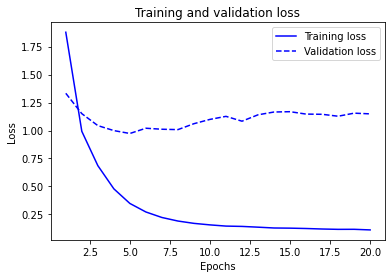

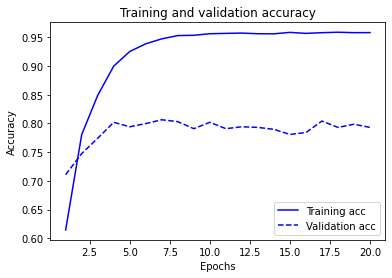

71/71 [==============================] - 0s 617us/step - loss: 1.1500 - accuracy: 0.7885
[1.1499518156051636, 0.7885128855705261]


In [182]:
import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score, confusion_matrics

history_dict1 = history1.history
loss_values1 = history_dict1["loss"]
val_loss_values1 = history_dict1["val_loss"]
epochs1 = range(1, len(loss_values1) + 1)

plt.plot(epochs1, loss_values1, "b", label="Training loss")
plt.plot(epochs1, val_loss_values1, "b--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.figure()
plt.clf()
acc1 = history_dict1["accuracy"]

val_acc1 = history_dict1["val_accuracy"]
plt.plot(epochs1, acc1, "b", label="Training acc")
plt.plot(epochs1, val_acc1, "b--", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(model1.evaluate(x_test,one_hot_test_labels))

In [183]:
epochs = 3

model2 = models.Sequential([
    #dense: neurons, activation function
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation = 'softmax') #softmax for many classes
])

model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history2 = model2.fit(xp_train,yp_train, epochs = epochs, batch_size = 128, validation_data= (x_val, y_val), verbose = 1)
model2.summary()

Epoch 1/3
64/64 [==============================] - 0s 4ms/step - loss: 1.8593 - accuracy: 0.6171 - val_loss: 1.3429 - val_accuracy: 0.7175
Epoch 2/3
64/64 [==============================] - 0s 3ms/step - loss: 0.9702 - accuracy: 0.7912 - val_loss: 1.1248 - val_accuracy: 0.7542
Epoch 3/3
64/64 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.8559 - val_loss: 1.0407 - val_accuracy: 0.7686
Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_153 (Dense)           (None, 64)                640064    
                                                                 
 dense_154 (Dense)           (None, 64)                4160      
                                                                 
 dense_155 (Dense)           (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable 

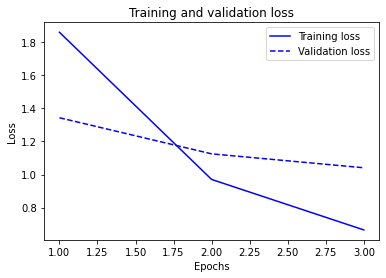

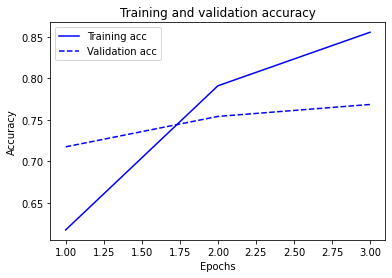

71/71 [==============================] - 0s 634us/step - loss: 0.9622 - accuracy: 0.7778
[0.9621661305427551, 0.777827262878418]


In [184]:
import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score, confusion_matrics

i=2
history_dict = 'history_dict{}'.format(i)
loss_values = 'loss_values{}'.format(i)
val_loss_values = 'val_loss_values{}'.format(i)
epochs = 'epochs{}'.format(i)
acc = 'acc{}'.format(i)
val_acc = 'val_acc{}'.format(i)
predicted = 'predicted{}'.format(i)
model = 'model{}'.format(i)
color = 'b'

history_dict = history2.history #
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "b", label="Training loss")
plt.plot(epochs, val_loss_values, "b--", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.figure()
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "b", label="Training acc")
plt.plot(epochs, val_acc, "b--", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(model2.evaluate(x_test,one_hot_test_labels)) #

In [203]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=46)
kmeans.fit(x_train)

AttributeError: module 'scipy.stats' has no attribute 'reciprocal'

In [201]:
import numpy as np

arr = np.array([1, 2, 3, 4])
reciprocal_arr = np.reciprocal(arr)
print(reciprocal_arr)


[1 0 0 0]
